# ENGRI 1120 Discussion 1: Fun With Total and Species Mass Balances

## Introduction
Suppose we are interested in tracking the mass fraction of each of the chemical components in the species set $\mathcal{M}$ for a mixing process, e.g., different component streams flow into a mixing unit, and a blended stream exits the unit. Then, we can write the _species mass balance_ for component $i$ in the mixing unit as:

$$\sum_{s\in\mathcal{S}}\nu_{s}\dot{m}_{s,i} + \dot{m}_{G,i} = \frac{dm_{i}}{dt}\qquad{i\in\mathcal{M}}$$

where $m_{i}$ denotes the mass of species $i$ (units: kg), $\mathcal{S}$ denotes the set of streams associated with the mixing unit, $\dot{m}_{s,i}$ denotes the mass flow rate of component $i$ in stream $s$ (units: kg i per hour), $\dot{m}_{G,i}$ denotes the generation rate for species $i$ (units: kg i per hour) and $\nu_{s}$ denotes the stream direction parameter. 

__Assumptions__:
1. Three _non-reactive_ chemical species, A, B, and C, are present in the system; thus, the species set is given by $\mathcal{M}=\left\{A,B,C\right\}$
1. Two input streams enter the mixing unit, while a single output stream exits the unit; $w_{i,s}$ denotes the mass fraction of chemical component $i$ in stream $s$ and the stream set is given by $\mathcal{S} = \left\{1,2,3\right\}$ where $s=1,2$ are input streams and $s=3$ is an output stream. 
1. The flow rate of component $i$ in the exit stream ($s=3$) is given by: $\dot{m}_{3,i} = \kappa{m_{i}}$, where $\kappa$ denotes a parameter (given in the problem)
1. The mixing unit starts empty; thus $m_{i}\left(t_{o}\right) = 0~\forall{i}$.

## Materials and Methods

### Project setup
The code block below installs (and loads) [Julia](https://julialang.org) packages that we use to solve the species mass balance equations. 

In [1]:
import Pkg; Pkg.activate("."); Pkg.resolve(); Pkg.instantiate();

  Activating project at `~/Desktop/julia_work/ENGRI-1120-IntroToChemE-Example-Notebooks/labs/lab-1-fun-w-mass-balances`
  No Changes to `~/Desktop/julia_work/ENGRI-1120-IntroToChemE-Example-Notebooks/labs/lab-1-fun-w-mass-balances/Project.toml`
  No Changes to `~/Desktop/julia_work/ENGRI-1120-IntroToChemE-Example-Notebooks/labs/lab-1-fun-w-mass-balances/Manifest.toml`


In [2]:
using Distributions
using TOML
using Plots
using Colors
using PrettyTables

### Load the Lab 1 code library
The call to the `include` function loads the `ENGRI-1120-Lab-1-CodeLib.jl` library into the notebook; the library contains functions that we can use during the lab. In particular:

* The `simulate_species_mass_balances` function takes configuration information, solves the species mass balances, and returns the solution
* The `simulate_total_mass_balances` function takes configuration information, solves the total mass balances, and returns the solution
* the `build_config` function takes a `path` string, and returns the configuration dictionary

In [3]:
include("ENGRI-1120-Lab-1-CodeLib.jl"); 

#### Example: solve the dynamic system of species mass balances
The simulation details are stored in a [TOML](https://toml.io/en/) file in the `configuration` directory. The configuration file holds information about the rate and composition of the feed coming into the mixing unit and some other parameters that are required for the mixing simulation. 

To load the configuration file:
* Specify the path to the configuration file using the `joinpath` command
* Pass this path to the `build_config` command (loaded from `ENGRI-1120-Lab-1-CodeLib.jl`) which parses the [TOML](https://toml.io/en/) file, and returns a [Julia Dictionary](https://docs.julialang.org/en/v1/base/collections/#Base.Dict) holding information about the simulation.

In [4]:
# Setup the path to the file we want to load -
path_to_config_file = joinpath(pwd(), "configuration", "Example-Tank.toml")

# load the config file with simulation details -
config_dict = build_config(path_to_config_file);

The species mass balance equations are solved using the `simulate_species_mass_balances` function (loaded from `ENGRI-1120-Lab-1-CodeLib.jl`). This function takes the configuration dictionary and returns the time array `T` which has dimension number of timesteps $\times$ 1, and the state array `X` which has dimension number of timesteps $\times$ 3.

In [5]:
(T₁,X₁) = simulate_species_mass_balances(config_dict; σ = 0.0); # solve the species balances, with no process noise
(T₂,X₂) = simulate_species_mass_balances(config_dict; σ = 0.5); # solve the species balances, with process noise

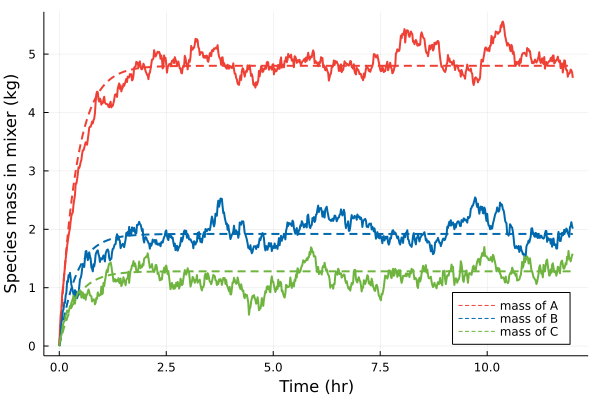

In [6]:
# visualize -

# no noise - dashes
plot(T₁,X₁[:,1],lw=2, label="mass of A", c=colorant"#EF4035", legend=:bottomright, ls=:dash)
plot!(T₁,X₁[:,2],lw=2, label="mass of B", c=colorant"#0068AC", ls=:dash)
plot!(T₁,X₁[:,3],lw=2, label="mass of C", c=colorant"#6EB43F", ls=:dash)

# with noise -
plot!(T₂,X₂[:,1],lw=2, label="", c=colorant"#EF4035")
plot!(T₂,X₂[:,2],lw=2, label="", c=colorant"#0068AC")
plot!(T₂,X₂[:,3],lw=2, label="", c=colorant"#6EB43F")

# labels -
xlabel!("Time (hr)", fontsize=18)
ylabel!("Species mass in mixer (kg)", fontsize=18)

## Problems

Solve the dynamic species mass balance equations for the mixer unit using the system configuration contained in the `SpeciesMassBalances-Mixer.toml` file.

In [7]:
# load/parse the configuration file to build the configuration dictionary

# Setup the path to the file we want to load -
path_to_config_file_v2 = joinpath(pwd(), "configuration", "SpeciesMassBalances-Mixer.toml")

# load the config file with simulation details -
config_dict_v2 = build_config(path_to_config_file_v2);

In [8]:
# Solve the species mass balance system of equations using the simulate_species_mass_balances function
# Fill me in ...
(T₃,X₃) = simulate_species_mass_balances(config_dict_v2; σ = 0.0); # solve the species balances, with no process noise

Now that we have the simulation data, let's answer some questions using this 

#### 1) How long does it take for the species mass balances to reach steady state?

__1.1__: Show that the steady state level for species mass for component $i$, denoted by $m^{\star}_{i}$, given by:

$$ m_{i}^{\star} = \frac{1}{\kappa}\left(\dot{m}_{1,i}+\dot{m}_{2,i}\right)$$

Compute the steady state value for $m^{\star}_{i}$.

In [25]:
# Compute the steady-state species mass values

# Fancy soln - pull data from the config dictionary, calculate the species mass flow rates
ṁ₁ = config_dict_v2["parameters"]["m_dot_in_1"]
ṁ₂ = config_dict_v2["parameters"]["m_dot_in_2"]
w₁ = config_dict_v2["parameters"]["w_in_1"] 
w₂ = config_dict_v2["parameters"]["w_in_2"] 
κ = config_dict_v2["parameters"]["kappa"] 

# compute the steady-state value using the analytical solution shown above
m_star_analytical = (1/κ)*(ṁ₁*w₁ .+ ṁ₂*w₂); # hmmm ... Can you figure what I'm doing here??

# grab the *last* row of the X₃ solution
m_star_numerical = X₃[end,:];

In [24]:
# build a pretty table -
# header row -
state_table_header_row = (["Species","m_star_analytical","m_star_numerical"],["","","mass", "mass"]);

# setup state table data array =
state_table_array = Array{Any,2}(undef, 3,3)

# fill in the state table -

# row 1 -
state_table_array[1,1] = "A"
state_table_array[1,2] = m_star_analytical[1]
state_table_array[1,3] = m_star_numerical[1]

# row 2 -
state_table_array[2,1] = "B"
state_table_array[2,2] = m_star_analytical[2]
state_table_array[2,3] = m_star_numerical[2]

# row 3 -
state_table_array[3,1] = "C"
state_table_array[3,2] = m_star_analytical[3]
state_table_array[3,3] = m_star_numerical[3]


# Show the table
pretty_table(state_table_array; header=state_table_header_row)

┌─────────┬───────────────────┬──────────────────┐
│ Species │ m_star_analytical │ m_star_numerical │
│         │                   │             mass │
├─────────┼───────────────────┼──────────────────┤
│       A │               3.2 │              3.2 │
│       B │              2.88 │             2.88 │
│       C │              1.92 │             1.92 │
└─────────┴───────────────────┴──────────────────┘


__1.2__: Develop an algorithm to _estimate_ the time at which the system reaches steady state, denote this time as $t^{\star}$. Is $t^{\star}$ the same time for all members of the species set $\mathcal{M}$?

There are many ways to approach this question, we are going to use the [findfirst](https://docs.julialang.org/en/v1/base/arrays/#Base.findfirst-Tuple{Function,%20Any}) function in [Julia](https://julialang.org) to find the index of the first element of the time array that is bigger than a threshold value, say $\epsilon\times{m}^{\star}_{1}$, where $\epsilon$ is a user defined parameter.


In [26]:
# Estimate t-star for A, B and C

# setup problem -
ϵ_array = range(0.0,stop=0.9999,step=0.001) |> collect
T_array = Array{Float64,1}()
sᵢ = 1 # what species do we want to look at?

for ϵ ∈ ϵ_array
    
    # finds first element that is larger than the ϵ*m_star_analytical[sᵢ]
    idx = findfirst(x-> x>= ϵ*m_star_analytical[sᵢ], X₃[:,sᵢ])
    push!(T_array, T₃[idx])
end

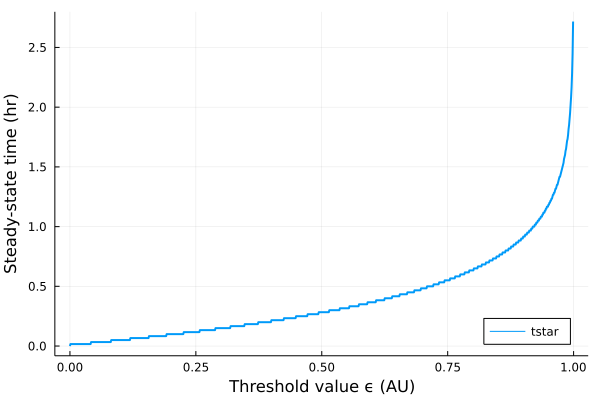

In [31]:
# make a plot -
plot(ϵ_array, T_array, lw=2, label="tstar", legend=:bottomright)
xlabel!("Threshold value ϵ (AU)", fontsize=18)
ylabel!("Steady-state time (hr)", fontsize=18)

#### 2) Is the conservation of total mass true at steady state? 
__2.1__: Solve the total mass system using the system configuration contained in the `TotalMassBalance-Mixer.toml` file. 

In [39]:
# load/parse the configuration file to build the configuration dictionary
# Setup the path to the file we want to load -
path_to_config_file_v3 = joinpath(pwd(), "configuration", "TotalMassBalance-Mixer.toml")

# load the config file with simulation details -
config_dict_v3 = build_config(path_to_config_file_v3);

In [41]:
# Solve the total mass balance system of equations using the simulate_total_mass_balances function
(T₄,X₄) = simulate_total_mass_balances(config_dict_v3);

__2.2__: Test the conservation of mass principle using the solution of the total mass balance at steady state. 

If conservation of mass is true, then at steady-state, the total rate of mass in equals the rate of mass out, i.e.,

$$\dot{m}_{3,T} = \dot{m}_{1,T}+\dot{m}_{2,T}$$

Let's compute $\dot{m}_{\star,T}$ from the problem and simulation data to see if this is true

In [45]:
# compute the input totals -
ṁ₁_total = sum(ṁ₁*w₁);
ṁ₂_total = sum(ṁ₂*w₂);

# compute the output total -
ṁ₃_total = κ*X₄[end]; # hmmm. Why is the multipled by κ?

# what is the difference between the sim output and the input?
error = (ṁ₃_total - (ṁ₁_total + ṁ₂_total))

-9.876544027065393e-13

#### 3) Compute the steady state composition (mass fraction of A, B and C) of the blended exit stream

In [35]:
# compute the species mass in stream 3 (the exit stream)
ṁ₃ = κ*X₃[end,:];

# what is the total in stream 3 -
ṁ₃_total = sum(ṁ₃)

# compute the mol fractions -
w_array = (1/ṁ₃_total)*ṁ₃;

In [38]:
# build a pretty table for the mass fractions -
mass_frac_table_header = (["Species", "ṁ₃_i", "wᵢ"],["","mass/time",""])

# setup table storage -
mass_frac_table_data = Array{Any,2}(undef, 4,3)

# fill in the state table -

# row 1 -
mass_frac_table_data[1,1] = "A"
mass_frac_table_data[1,2] = ṁ₃[1]
mass_frac_table_data[1,3] = w_array[1]

# row 2 -
mass_frac_table_data[2,1] = "B"
mass_frac_table_data[2,2] = ṁ₃[2]
mass_frac_table_data[2,3] = w_array[2]

# row 3 -
mass_frac_table_data[3,1] = "C"
mass_frac_table_data[3,2] = ṁ₃[3]
mass_frac_table_data[3,3] = w_array[3]

# row 4 -
mass_frac_table_data[4,1] = "Total"
mass_frac_table_data[4,2] = sum(ṁ₃)
mass_frac_table_data[4,3] = sum(w_array)


# Show the table
pretty_table(mass_frac_table_data; header=mass_frac_table_header)

┌─────────┬───────────┬──────┐
│ Species │      ṁ₃_i │   wᵢ │
│         │ mass/time │      │
├─────────┼───────────┼──────┤
│       A │       8.0 │  0.4 │
│       B │       7.2 │ 0.36 │
│       C │       4.8 │ 0.24 │
│   Total │      20.0 │  1.0 │
└─────────┴───────────┴──────┘
